In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [3]:
tech_data=pd.read_csv("technical_support_data-2.csv")

In [4]:
tech_data.shape

(23, 8)

In [5]:
tech_data["PROBLEM_TYPE"]

count                                  23
unique                                 23
top       Temperature control not working
freq                                    1
Name: PROBLEM_TYPE, dtype: object

In [14]:
techSupAt=tech_data.iloc[:,1:]
scaledAt=techSupAt.apply(zscore)

## Elbow method

In [39]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaledAt)
    prediction=model.predict(scaledAt)
    meanDistortions.append(sum(np.min(cdist(scaledAt ,model.cluster_centers_,"euclidean"),axis=1))/scaledAt.shape[0])

C:\Users\vinee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
meanDistortions

[2.5132186215720433,
 2.011069807948648,
 1.633958126099869,
 1.4661262666709103,
 1.219279020313038,
 1.0620842732423292,
 0.9815040637871222,
 0.8636657490946983,
 0.7832100384150046]

Text(0.5, 1.0, 'Elbow MEthod')

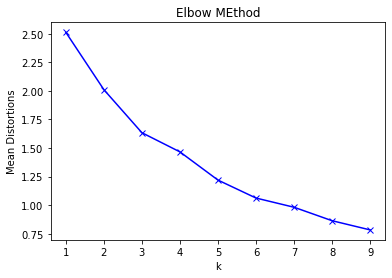

In [41]:
plt.plot(clusters,meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Mean Distortions")
plt.title("Elbow MEthod")

In [42]:
# As the elbow looks to be lying between 3 and 5 we test the values 
# of k from 3 to 5 manually